In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Imagen 3 Image Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fimagen3_image_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/imagen3_image_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            


| Author |
| --- |
| [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Imagen 3

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 3 and Imagen 3 Fast models to generate images showcasing:

- Photorealistic scenes
- Prompt enhancement
- Text rendered within images
- Quality and latency comparisons within the two models

## Get started


### Install Google Gen AI SDK for Python


In [2]:
%pip install --upgrade --quiet google-genai

Note: you may need to restart the kernel to use updated packages.


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [3]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [4]:
from google import genai
from google.genai import types

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

In [10]:
os.environ.get("GOOGLE_CLOUD_PROJECT")

'qwiklabs-gcp-04-de62f2be51eb'

In [11]:
PROJECT_ID

'qwiklabs-gcp-04-de62f2be51eb'

In [13]:
os.environ.get("GOOGLE_CLOUD_REGION")

'us-central1'

In [14]:
LOCATION

'us-central1'

In [15]:
client

### Define a helper function

In [17]:
import typing

import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps


def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
        
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

### Load the image generation models

Imagen 3: `imagen-3.0-generate-002`

Imagen 3 Fast: `imagen-3.0-fast-generate-001`

In [7]:
generation_model = "imagen-3.0-generate-002"
generation_model_fast = "imagen-3.0-fast-generate-001"

### Imagen 3 & Imagen 3 Fast

With Imagen 3, you also have the option to use Imagen 3 Fast. These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 3:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 3 Fast:** Suitable for creating brighter images with a higher contrast. Overall, you can see a 40% decrease in latency in Imagen 3 Fast compared to Imagen 2.

With Imagen 3 and Imagen 3 Fast, you can also configure the `aspect ratio` to any of the following:
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

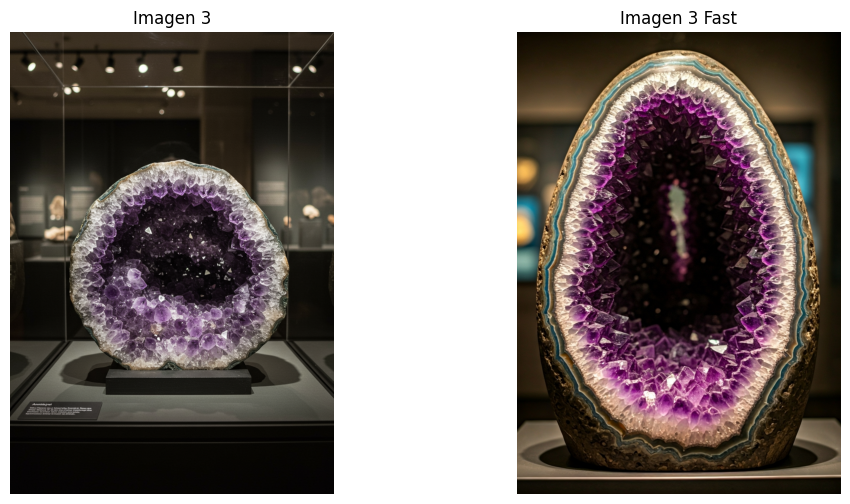

In [8]:
import matplotlib.pyplot as plt

prompt = """
a photorealistic image of the inside of an amethyst crystal on display in a museum
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

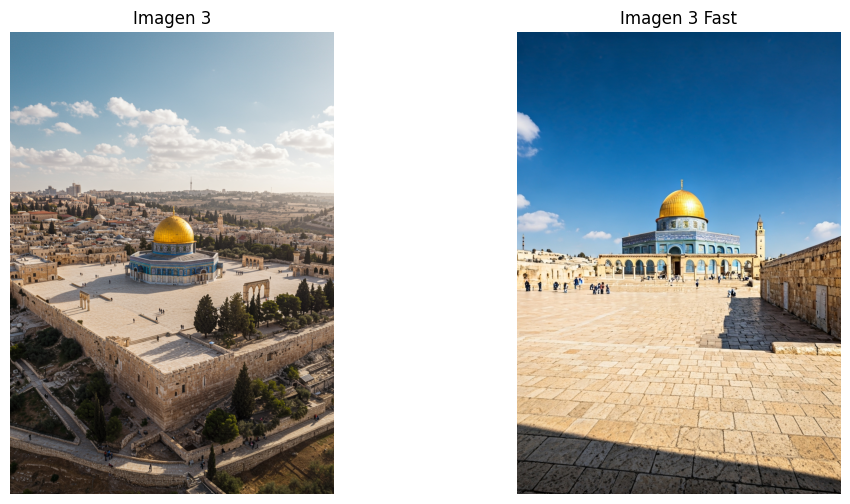

In [18]:
import matplotlib.pyplot as plt

prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="3:4",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

#### Try different image aspect_ratios
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

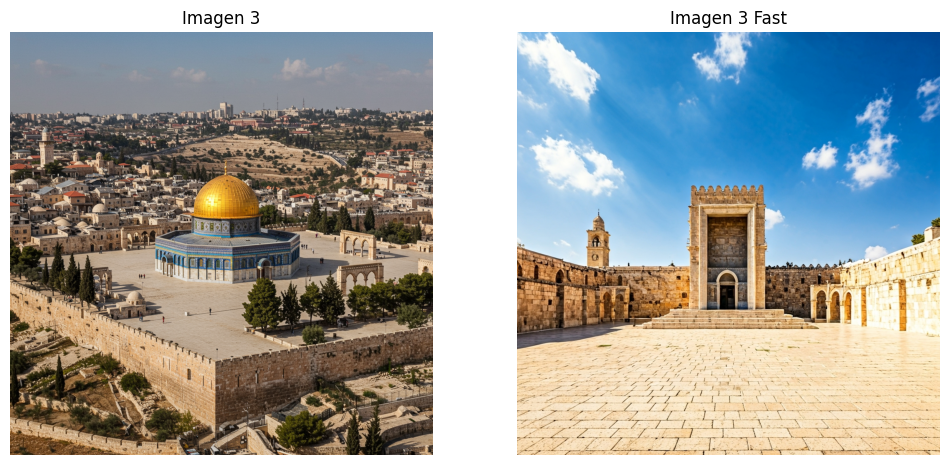

In [19]:
aspect_ratio = "1:1"

prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

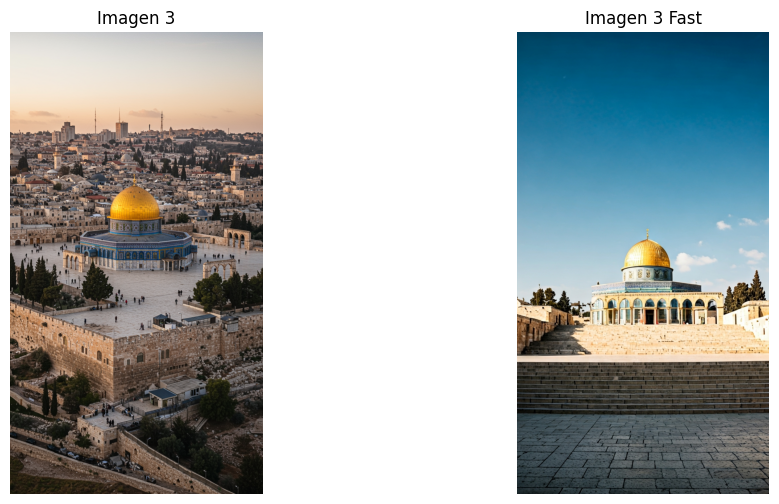

In [20]:
aspect_ratio = "9:16"

prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

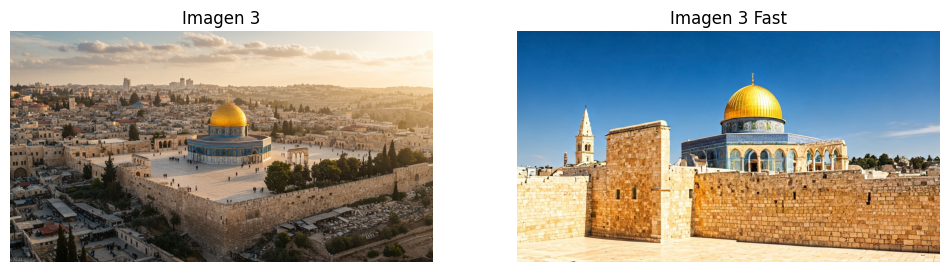

In [21]:
aspect_ratio = "16:9"

prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

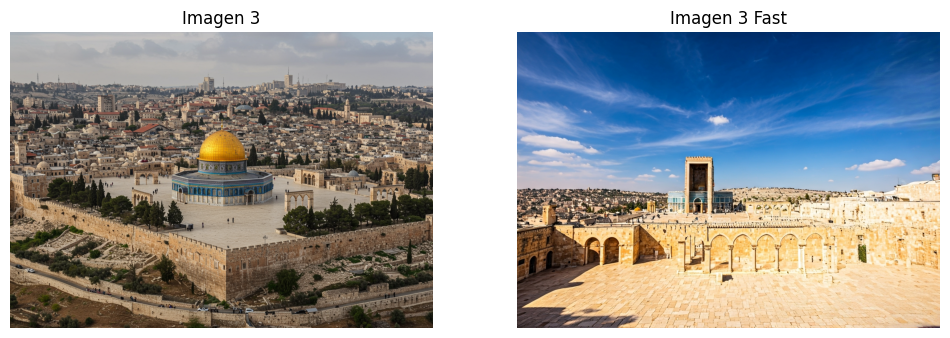

In [26]:
aspect_ratio = "4:3"

prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

# Imagen 3 image generation
image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # width:height aspect_ratio
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio=aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

### Prompt rewriter

The `imagen-3.0-generate-002` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality images.

In [28]:
image_copy = image
image_copy

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      enhanced_prompt="A photorealistic image of the Temple Mount, with its iconic Dome of the Rock and surrounding walls, nestled within the Old City of Jerusalem. The intricate details of the golden dome, the surrounding stone structures, and the ancient walls are rendered with remarkable precision. The surrounding landscape of Jerusalem unfolds in panoramic detail, showcasing the cityscape, the Kidron Valley, and the distant Judean Mountains. The image captures the historical significance and the architectural marvel of this sacred site, featuring a rich tapestry of textures and colors. The photograph's vibrant color palette and high-resolution detail showcase the beauty and majesty of the site, enhancing the sense of realism and detail.",
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x00\x00\x00\x03\x80\x08\x02\x00\x00\x00\xea\xe6IB\x00\x00\x00\x83zTXtRaw profile type iptc\x0

A wide-angle, high-quality photograph of a grand, modern art museum with a glass facade reflecting the cityscape and a vibrant sky. The building's sleek architecture showcases a dynamic blend of geometric lines and expansive windows, allowing natural light to flood the interior spaces. Inside, a diverse crowd of art enthusiasts wander through the museum's expansive galleries. A variety of modern and contemporary artworks are displayed, with vibrant colors and abstract patterns. A few sculptures are scattered throughout the museum. The scene is captured with a soft, natural light that enhances the colors and textures of the artwork, enhancing the viewer's appreciation for the artistry on display. The museum is in a busy city center, surrounded by skyscrapers.


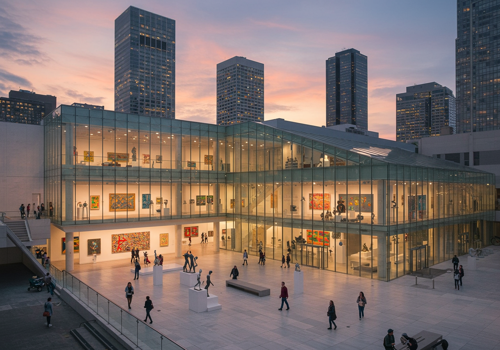

In [29]:
prompt = """
an art museum
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio=aspect_ratio,
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Print the enhanced prompt
# TypeError: 'NoneType' object is not subscriptable
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

In [30]:
image.generated_images

[GeneratedImage(
   enhanced_prompt="A wide-angle, high-quality photograph of a grand, modern art museum with a glass facade reflecting the cityscape and a vibrant sky. The building's sleek architecture showcases a dynamic blend of geometric lines and expansive windows, allowing natural light to flood the interior spaces. Inside, a diverse crowd of art enthusiasts wander through the museum's expansive galleries. A variety of modern and contemporary artworks are displayed, with vibrant colors and abstract patterns. A few sculptures are scattered throughout the museum. The scene is captured with a soft, natural light that enhances the colors and textures of the artwork, enhancing the viewer's appreciation for the artistry on display. The museum is in a busy city center, surrounded by skyscrapers.",
   image=Image(
     image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x00\x00\x00\x03\x80\x08\x02\x00\x00\x00\xea\xe6IB\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x

A photorealistic image of the Temple Mount, with its iconic Dome of the Rock and surrounding walls, nestled within the Old City of Jerusalem. The intricate details of the golden dome, the surrounding stone structures, and the ancient walls are rendered with sharp focus and a high level of detail, showcasing the rich textures and colors of the site. The landscape is captured in vivid detail, showcasing the surrounding cityscape, including the distant hills and the mix of traditional and modern buildings, creating a sense of depth and scale. The light is natural, warm and soft, with a clear blue sky as backdrop, enhancing the overall beauty of the scene. The image is composed with a wide-angle lens to capture the grandeur of the site and its surroundings, showcasing the intricate architectural details and surrounding landscape. The image has a high dynamic range, capturing the contrast between light and shadow and highlighting the rich textures of the stonework.


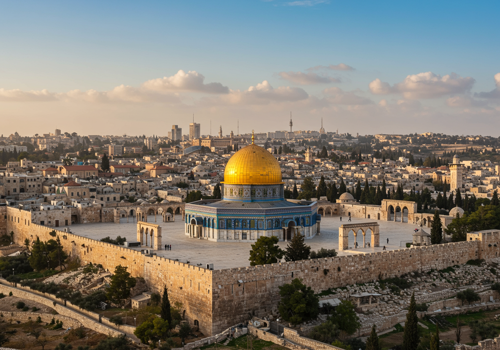

In [31]:
prompt = """
a photorealistic image of temple mount and the surrounding landscape
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio=aspect_ratio,
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

# Print the enhanced prompt
# TypeError: 'NoneType' object is not subscriptable
print(image.generated_images[0].enhanced_prompt)
display_image(image.generated_images[0].image)

In [33]:
image

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      enhanced_prompt='A photorealistic image of the Temple Mount, with its iconic Dome of the Rock and surrounding walls, nestled within the Old City of Jerusalem. The intricate details of the golden dome, the surrounding stone structures, and the ancient walls are rendered with sharp focus and a high level of detail, showcasing the rich textures and colors of the site. The landscape is captured in vivid detail, showcasing the surrounding cityscape, including the distant hills and the mix of traditional and modern buildings, creating a sense of depth and scale. The light is natural, warm and soft, with a clear blue sky as backdrop, enhancing the overall beauty of the scene. The image is composed with a wide-angle lens to capture the grandeur of the site and its surroundings, showcasing the intricate architectural details and surrounding landscape. The image has a high dynamic range, capturing the contrast between light a

In [32]:
image.generated_images

[GeneratedImage(
   enhanced_prompt='A photorealistic image of the Temple Mount, with its iconic Dome of the Rock and surrounding walls, nestled within the Old City of Jerusalem. The intricate details of the golden dome, the surrounding stone structures, and the ancient walls are rendered with sharp focus and a high level of detail, showcasing the rich textures and colors of the site. The landscape is captured in vivid detail, showcasing the surrounding cityscape, including the distant hills and the mix of traditional and modern buildings, creating a sense of depth and scale. The light is natural, warm and soft, with a clear blue sky as backdrop, enhancing the overall beauty of the scene. The image is composed with a wide-angle lens to capture the grandeur of the site and its surroundings, showcasing the intricate architectural details and surrounding landscape. The image has a high dynamic range, capturing the contrast between light and shadow and highlighting the rich textures of the

### Photorealism and prompt understanding

**Photorealism:** Imagen 3 is capable of generating photorealistic, lifelike images with fewer distracting visual artifacts than our previous models. This increased quality is especially prevalent when generating images of multiple people, animals, and landscapes.

**Prompt adherence:** It's also better at understanding natural language and the intent behind your prompts. Thus, they can be written in everyday language and can include specific details including camera angles, lens types, lighting, and stylistic features.

When generating images of people you can also set the `safety_filter_level` and `person_generation` parameters accordingly:
* `person_generation`: DONT_ALLOW, ALLOW_ADULT, ALLOW_ALL
* `safety_filter_level`: BLOCK_LOW_AND_ABOVE, BLOCK_MEDIUM_AND_ABOVE, BLOCK_ONLY_HIGH, BLOCK_NONE

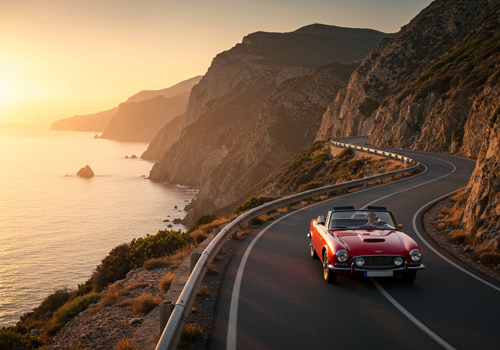

In [41]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
"""
# Family in the car.

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

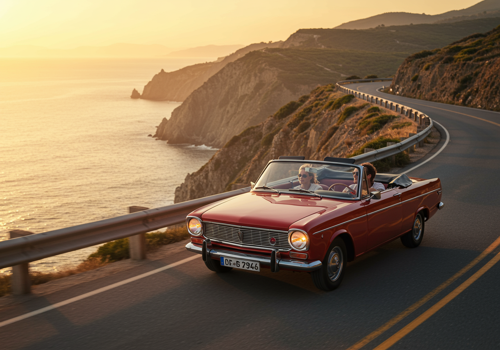

In [51]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
Family in the car.
"""
# Family with kids in the car.


image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_image(image.generated_images[0].image)

In [64]:
# https://cloud.google.com/vertex-ai/generative-ai/docs/image/responsible-ai-imagen#safety-categories
# not sure why VertexAI is not showing the safety_filter or person_generation that have been triggered

prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
Family with kids in the car.
"""


image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

display_image(image.generated_images[0].image)


TypeError: 'NoneType' object is not subscriptable

In [95]:
def display_image_w_info(
    image,
    max_width: int = 600,
    max_height: int = 350,
):
    
    
    # Check for prompt feedback (e.g., if the prompt itself was blocked)
    if image.prompt_feedback:
        print("\n--- Prompt Feedback ---")
        for feedback in image.prompt_feedback:
            print(f"Block Reason: {feedback.block_reason.name}")
            print(f"Safety Attributes: {feedback.safety_attributes}")

        # If the prompt was blocked, no images were generated, which explains the TypeError later.
        return # Stop execution if the prompt was blocked.

    # Check for generated image safety attributes (if images *were* generated but then filtered)
    if image.generated_images:
        for i, gen_image in enumerate(image.generated_images):
            if gen_image.image is None:
                print(f"\n--- Image {i} Blocked ---")
                print(f"Filter Reason: {gen_image.safety_attributes.blocked_reasons}")
                print(f"Safety Scores: {gen_image.safety_attributes.scores}")
                # You can also check gen_image.safety_attributes.categories
    else:
        # If both generated_images is empty AND prompt_feedback is empty/None, 
        # it could be another API error (e.g., network, quota) or a complete block 
        # where the API chose not to return detailed block reasons.
        print("\n⚠️ No images generated and no explicit prompt feedback found. The request was likely blocked.")
        print("Check Vertex AI Model Garden or documentation for possible API-level safety restrictions.")
        
        
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
        
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)
    
    return image


In [98]:
# https://cloud.google.com/vertex-ai/generative-ai/docs/image/responsible-ai-imagen#safety-categories
# not sure why VertexAI is not showing the safety_filter or person_generation that have been triggered

prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
Family with kids in the car.
"""


image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
    ),
)

# img = display_image_w_info(image.generated_images[0].image)
img = display_image_w_info(image)
img

AttributeError: 'GenerateImagesResponse' object has no attribute 'prompt_feedback'

In [109]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
Family with kids in the car.
"""


image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
        
        
        # ADD THESE LINES to enable verbose filtering feedback
        include_rai_reason=True, 
        include_safety_attributes=True,
    ),
)

In [110]:
# None
image.generated_images

[GeneratedImage(
   image=Image(),
   rai_filtered_reason='Unable to show generated images. Your current safety settings for people/face generation filtered out images that appeared to include children. You will not be charged for blocked images. Try rephrasing the prompt. If you think this was an error, send feedback. Support codes: 58061214',
   safety_attributes=SafetyAttributes()
 )]

In [111]:
image

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      image=Image(),
      rai_filtered_reason='Unable to show generated images. Your current safety settings for people/face generation filtered out images that appeared to include children. You will not be charged for blocked images. Try rephrasing the prompt. If you think this was an error, send feedback. Support codes: 58061214',
      safety_attributes=SafetyAttributes()
    ),
  ],
  positive_prompt_safety_attributes=SafetyAttributes(
    categories=[
      'Death, Harm & Tragedy',
      'Firearms & Weapons',
      'Hate',
      'Health',
      'Illicit Drugs',
      <... 7 more items ...>,
    ],
    content_type='Positive Prompt',
    scores=[
      0.3,
      0.0,
      0.0,
      0.0,
      0.0,
      <... 7 more items ...>,
    ]
  )
)

In [119]:
image.__dict__

{'sdk_http_response': None,
 'generated_images': [GeneratedImage(
    image=Image(),
    rai_filtered_reason='Unable to show generated images. Your current safety settings for people/face generation filtered out images that appeared to include children. You will not be charged for blocked images. Try rephrasing the prompt. If you think this was an error, send feedback. Support codes: 58061214',
    safety_attributes=SafetyAttributes()
  )],
 'positive_prompt_safety_attributes': SafetyAttributes(
   categories=[
     'Death, Harm & Tragedy',
     'Firearms & Weapons',
     'Hate',
     'Health',
     'Illicit Drugs',
     <... 7 more items ...>,
   ],
   content_type='Positive Prompt',
   scores=[
     0.3,
     0.0,
     0.0,
     0.0,
     0.0,
     <... 7 more items ...>,
   ]
 )}

In [121]:
image.generated_images

[GeneratedImage(
   image=Image(),
   rai_filtered_reason='Unable to show generated images. Your current safety settings for people/face generation filtered out images that appeared to include children. You will not be charged for blocked images. Try rephrasing the prompt. If you think this was an error, send feedback. Support codes: 58061214',
   safety_attributes=SafetyAttributes()
 )]

In [122]:
image.positive_prompt_safety_attributes

SafetyAttributes(
  categories=[
    'Death, Harm & Tragedy',
    'Firearms & Weapons',
    'Hate',
    'Health',
    'Illicit Drugs',
    <... 7 more items ...>,
  ],
  content_type='Positive Prompt',
  scores=[
    0.3,
    0.0,
    0.0,
    0.0,
    0.0,
    <... 7 more items ...>,
  ]
)

In [123]:
image.positive_prompt_safety_attributes.categories

['Death, Harm & Tragedy',
 'Firearms & Weapons',
 'Hate',
 'Health',
 'Illicit Drugs',
 'Politics',
 'Porn',
 'Religion & Belief',
 'Toxic',
 'Violence',
 'Vulgarity',
 'War & Conflict']

In [124]:
image.positive_prompt_safety_attributes.scores

[0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1]

In [125]:
image.positive_prompt_safety_attributes.content_type

'Positive Prompt'

In [126]:
image.positive_prompt_safety_attributes.scores

[0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1]

In [114]:
image2 = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ADULT",
        
        
        # # ADD THESE LINES to enable verbose filtering feedback
        # include_rai_reason=True, 
        # include_safety_attributes=True,
    ),
)

In [117]:
image2

GenerateImagesResponse(
  sdk_http_response=HttpResponse(
    headers=<dict len=9>
  )
)

In [118]:
image2.__dict__

{'sdk_http_response': HttpResponse(
   headers=<dict len=9>
 ),
 'generated_images': None,
 'positive_prompt_safety_attributes': None}

In [116]:
image2.sdk_http_response.headers

{'content-type': 'application/json; charset=UTF-8',
 'vary': 'Origin, X-Origin, Referer',
 'content-encoding': 'gzip',
 'date': 'Wed, 08 Oct 2025 10:00:30 GMT',
 'server': 'scaffolding on HTTPServer2',
 'x-xss-protection': '0',
 'x-frame-options': 'SAMEORIGIN',
 'x-content-type-options': 'nosniff',
 'transfer-encoding': 'chunked'}

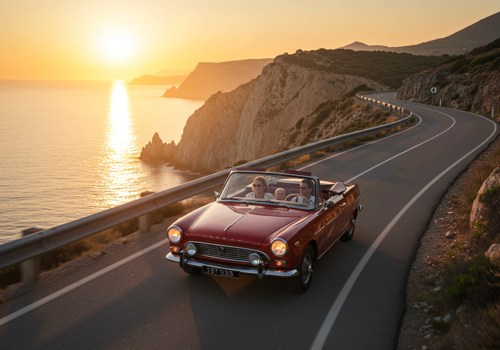

In [55]:
prompt = """
A vintage, red convertible car speeds along a winding cliffside road.
The car is slightly angled, facing towards the viewer, with one wheel slightly off the edge of the road.
The setting sun casts a warm, golden light across the scene, illuminating the car and the dramatic, rocky cliffs.
In the distance, the vast ocean stretches towards the horizon.
Family of 2 adults and 1 baby in the car. Ensure baby is in the car.
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        # aspect_ratio="1:1",
        aspect_ratio = aspect_ratio,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="ALLOW_ALL",
    ),
)

display_image(image.generated_images[0].image)

### Better text rendering

Imagen 3 also does a great job accurately rendering small words and phrases in images. This could be particularly useful for generating business cards, posters, banners, product designs, or greeting cards.

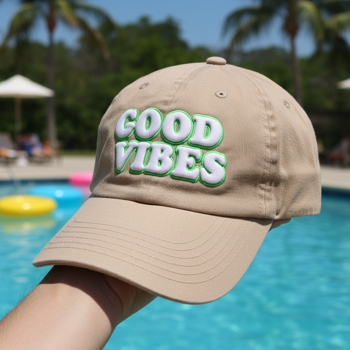

In [56]:
prompt = """
a beige baseball cap with 'good vibes' written on top in white bubbly stitched letters that are outlined in neon green,
display it against a pool background with palm trees and pool floats
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

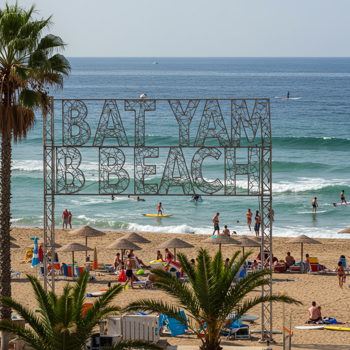

In [57]:
prompt = """
photorealistic image of Bat Yam Beach, with the text 'Bat Yam Beach' shaped by a metallic structure.
display it against a beach and waves background with palm trees, tanning beds, people tanning, people surfing on surfboards in the distance
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

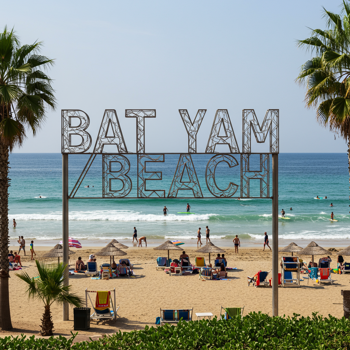

In [59]:
prompt = """
photorealistic image of Bat Yam Beach, with the text 'Bat Yam Beach' shaped by a metallic structure.
display it against a beach and waves background with palm trees, tanning beds, people tanning, people surfing on surfboards in the distance
"""

image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

display_image(image.generated_images[0].image)

In [60]:
image

GenerateImagesResponse(
  generated_images=[
    GeneratedImage(
      enhanced_prompt="""
photorealistic image of Bat Yam Beach, with the text 'Bat Yam Beach' shaped by a metallic structure.
display it against a beach and waves background with palm trees, tanning beds, people tanning, people surfing on surfboards in the distance
""",
      image=Image(
        image_bytes=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x04\x00\x08\x02\x00\x00\x00\xf0\x7f\xbc\xd4\x00\x00\x00\x83zTXtRaw profile type iptc\x00\x00\x08\x99M\x8b;\x0e\xc20\x10\x05{\x9f"G\xd8\xdd\xbc\xfd\xa4\xa6\xa2\xa3\xe0\x02\xb6\xe3\x95\x90"\x05q\xff\x02...',
        mime_type='image/png'
      ),
      safety_attributes=SafetyAttributes()
    ),
  ]
)

In [61]:
print(image.generated_images[0].enhanced_prompt)


photorealistic image of Bat Yam Beach, with the text 'Bat Yam Beach' shaped by a metallic structure.
display it against a beach and waves background with palm trees, tanning beds, people tanning, people surfing on surfboards in the distance

